<div class="logo">
  <a href="https://colab.research.google.com/github/profpaulonascimento/gcet059/blob/main/gcet059_integracao_trapezios.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

# <font color=green> INTRODUÇÃO

<font size=4>Vimos, em cursos de Cálculo Diferencial e Integral, que o valor da integral definida de uma função $f$, contínua no intervalo $[a, b]$, pode ser determinada através da fórmula de Newton-Leibnitz
$$\displaystyle\int_{a}^{b} f(x)~dx = F(b) - F(a),$$
desde que a primitiva $F$ da função $f$ seja conhecida e que um dos métodos de integração a resolva.

<font size=4>Em muitos casos é difícil ou às vezes até impossível determinarmos a primitiva de $f$. Portanto, nosso objetivo aqui é o de estudar métodos numéricos de integração na determinação de aproximações para os valores das integrais definidas através dos valores da imagem da função do integrando para valores uniformemente espaçados de seu domínio. Mais especificamente, os métodos de Newton-Côtes, em que utilizam polinômios interpoladores da função do integrando para obter tal aproximação.

## Integração Numérica Polinomial

<font size=4>Neste método numérico de integração, a aproximação para o problema de determinação da integral definida é feita através da substituição do integrando $f$ por um polinômio $p_{n}$ de grau $n$ suficientemente próximo, ou seja,
$$|f(x)-p_{n}(x)| < \varepsilon,\ x \in [a,b].$$

# <font color=green> MÉTODO DO TRAPÉZIO

<font size=4>Seja
$$I = \displaystyle\int_a^b f(x)~dx.$$
Queremos substituir a função $f$ por um polinômio interpolador de grau $1$ (uma aproximação para $f$).

<font size=4>Assim, por Lagrange, temos que
$$\begin{array}{rcl}
p_{1}(x)
&=& y_{0} \cdot L_{0}(x) + y_{1} \cdot L_{1}(x) \\ \\
&=& f(x_{0}) \cdot \dfrac{x-x_{1}}{x_{0}-x_{1}} + f(x_{1}) \cdot \dfrac{x-x_{0}}{x_{1}-x_{0}}.
\end{array}$$

<font size=4> Fazendo
$$\begin{array}{rcl}
a &=& x_{0} \\ \\
b &=& x_{1} \\ \\
h &=& x_{1}-x_{0} \\ \\
z &=& \dfrac{x-x_{0}}{h},
\end{array}$$
temos,
$$z-1 = \dfrac{x-x_{0}}{h} - 1 = \dfrac{x-x_{0}-h}{h} = \dfrac{x-x_{1}}{h}$$
e
$$dx = h~dz.$$

<font size=4>Segue que
$$\begin{array}{rcl}
I &=& \displaystyle\int_a^b f(x)~dx
\approx \displaystyle\int_{x_{0}}^{x_{1}} p_{1}(x)~dx \\[0.5cm]
&=& \displaystyle\int_{x_{0}}^{x_{1}} \left[f(x_{0}) \cdot \dfrac{x-x_{1}}{x_{0}-x_{1}} + f(x_{1}) \cdot \dfrac{x-x_{0}}{x_{1}-x_{0}}\right]~dx \\ \\
&=& \displaystyle\int_{x_{0}}^{x_{1}} \left[f(x_{0}) \cdot \dfrac{x-x_{1}}{-h} + f(x_{1}) \cdot \dfrac{x-x_{0}}{h}\right]~dx \\ \\
&=& -f(x_{0}) \displaystyle\int_{0}^{1} h(z-1)~dz + f(x_{1}) \displaystyle\int_{0}^{1} h z~dx \\ \\
&=& -h f(x_{0}) \left(\dfrac{z^2}{2}-z\right)\Big|_{0}^{1} + h f(x_{1}) \left(\dfrac{z^2}{2}\right)\Big|_{0}^{1} \\ \\
& = & \dfrac{f(x_{0})+f(x_{1})}{2h} (x_{0}^2+x_{1}^2-2x_{0}x_{1}) \\ \\
& = & \dfrac{f(x_{0})+f(x_{1})}{2h} (x_{1}-x_{0})^2 \\ \\
& = & \dfrac{h}{2} [f(x_{0})+f(x_{1})]
\end{array}$$

<font size=4>Portanto, o método do trapézio em $[a,b]$ obtém a seguinte aproximação:
\begin{equation*}
\displaystyle\int_a^b f(x)~dx \approx \dfrac{h}{2} [f(a)+f(b)]
\end{equation*}

## Gráfico ilustrativo mostrando a aproximação obtida

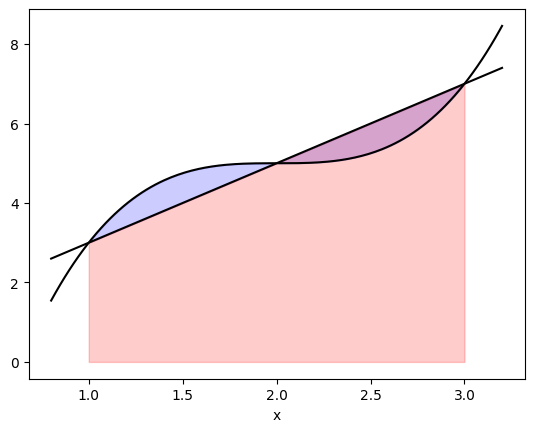

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.linspace(0.8,3.2,200)
x_1 = np.linspace(1,2,100)
x_2 = np.linspace(2,3,100)
x_3 = np.linspace(1,3,200)

# Sistema para calcular os coef da função f
#A = np.array([[1,1,1,1],[8,4,2,1],[27,9,3,1],[12,4,1,0.0]])
#b = np.array([[3],[5],[7.0],[0]])

#coef = np.linalg.inv(A)@b
#coef

f = lambda x: 2*x**3-12*x**2+24*x-11
g = lambda x: 2*x+1

plt.plot(x_plot,f(x_plot),c='black',)
plt.plot(x_plot,g(x_plot),c='black')


plt.fill_between(x_1, f(x_1), g(x_1), where=(f(x_1) > g(x_1)), color='blue', alpha=0.2)
plt.fill_between(x_2, f(x_2), g(x_2), where=(g(x_2) > f(x_2)), color='blue', alpha=0.2)
plt.fill_between(x_3, 0, g(x_3), where=(g(x_3) > 0), color='red', alpha=0.2)

plt.xlabel('x')
plt.show()

## Cota para o erro ao aplicar o método do Trapézio

<font size=4>Como
$$
\displaystyle\int_a^b f(x) ~dx
= \displaystyle\int_{x_{0}}^{x_{1}} [p_{1}(x) + E_p(x)] ~dx
\implies
\displaystyle\int_a^b f(x) ~dx - \displaystyle\int_{x_{0}}^{x_{1}} p_{1}(x) ~dx = \displaystyle\int_{x_{0}}^{x_{1}} E_p(x) ~dx.
$$

<font size=4>Logo, fazendo
$$E_{i}(x) = \displaystyle\int_a^b f(x) ~dx - \displaystyle\int_{x_{0}}^{x_{1}} p_{1}(x) ~dx,$$
como sendo o erro na integração utilizando a regra do trapézio, temos:
$$
E_{i}(x) = \displaystyle\int_{x_{0}}^{x_{1}} E_p(x) ~dx.
$$

<font size=4>Como o erro na interpolação polinomial através de um polinômio de grau um é dado por:
$$
E_p(x) = \dfrac{f''(c)}{2} (x-x_{0}) \cdot (x-x_{1}),
$$
temos que
$$
\begin{array}{rcl}
E_{i}(x)
& = & \displaystyle\int_{x_{0}}^{x_{1}} E_p(x) ~dx \\
&=& \displaystyle\int_{x_{0}}^{x_{1}} \dfrac{f''(c)}{2} (x-x_{0}) \cdot (x-x_{1}) ~dx \\
&=& \dfrac{f''(c)}{2} \left[\dfrac{x^3}{3} - (x_{0}+x_{1}) \dfrac{x^2}{2} + x_{0}x_{1} x\right]_{x_{0}}^{x_{1}} \\
& = & \dfrac{f''(c)}{2} \left[\dfrac{x_{1}^3-x_{0}^3}{3} - (x_{0}+x_{1}) \dfrac{x_{1}^2-x_{0}^2}{2} + x_{0}x_{1} (x_{1}-x_{0})\right] \\
& = & \dfrac{f''(c)}{12} \left(2x_{1}^3-2x_{0}^3-3x_{0}x_{1}^2+3x_{0}^3-3x_{1}^3+3x_{1}x_{0}^2+6x_{0}x_{1}^2-6x_{0}^2x_{1}\right) \\
& = & \dfrac{f''(c)}{12} (-x_{1}^3+x_{0}^3+3x_{0}x_{1}^2-3x_{0}^2x_{1}) \\
& = & \dfrac{f''(c)}{12} (x_{0}-x_{1})^3
\end{array}
$$

<font size=4>Como
$$x_{1}-x_{0} = h \implies x_{0}-x_{1} = -h,$$
temos que
$$E_{i}(x) = -\dfrac{f''(c)}{12} h^3.$$

<font size=4>Devido a impossibilidade de se obter o valor para $c$ tal que a equação acima seja satisfeita, fazemos uma estimativa do valor do erro $E_{i}$, substituindo $f''(c)$ por
$$\displaystyle \max_{x \in [a,b]} \{|f''(x)|\}.$$

<font size=4>Assim, o erro máximo ao aplicarmos a regra do trapézio na integração definida em $[a,b]$ é
$$E_{Imax} = \displaystyle \max_{x \in [a,b]} \{|f''(x)|\} \dfrac{h^3}{12}.$$

## Exemplo 01

<font size=4>Dado
$$\displaystyle\int_{0}^{0,1} x^2~dx,$$
determine:

>- <font size=4> (a) um valor aproximado utilizando o método do trapézio;
>- <font size=4> (b) uma estimativa para o erro;
>- <font size=4> (c) o erro.

### Solução:

<font size=4>(a) para determinar uma aproximação da integral, temos que

* <font size=4>$x_0 = 0$,
* $x_1 = 0.1$,
* $f(x_0) = 0^2 = 0$ e
* $f(x_1) = 0.1^2 = 0.01$

<font size=4>O código a seguir determina uma aproximação para o valor da integral em questão.

In [ ]:
f = lambda x: x**2
x0 = 0
x1 = 0.1
h = x1-x0

I_T = h/2*(f(x0)+f(x1))
I_T

0.0005000000000000001

<font size=4>(b) Para estimar o erro na integração pelo método do trapézios, temos que usar a fórmula:
$$E_{Imax} = \dfrac{h^3}{12}\displaystyle \max_{x \in [a,b]} \{|f''(x)|\}.$$

<font size=4>O código a seguir determina uma cota para o valor da integral em questão.

In [ ]:
import sympy as sp
x = sp.symbols('x')

EImax = float(sp.Derivative(f(x),x,x).doit()*h**3/12)
EImax

0.00016666666666666672

<font size=4>(c) Podemos determinar o valor exato da intergral, utilizando o teorema fundamental do Cálculo. Entretanto, o faremos utilizando os seguintes comandos: 

In [ ]:
I = float(sp.integrate(f(x),(x,0,0.1)))
I

0.0003333333333333334

<font size=4>A seguir, temos o valor exato do erro ao calcular a aproximação utilizando o método do trapézio.

In [ ]:
abs(I_T-I)

0.00016666666666666674

In [ ]:
EImax > abs(I_T-I)

False

# <font color=green> MÉTODO DOS TRAPÉZIOS ACUMULADOS

<font size=4>Podemos intuir, pela expressão do erro, que o método do trapézio só se torna interessante em casos os quais o intervalo $[a,b]$ é relativamente pequeno. Nos casos em que o intervalo $[a,b]$ é grande, devemos dividi-lo em $m$ partes iguais de modo a aplicar a regra do trapézio repetidas vezes, em cada um desses intervalos.

<font size=4>Seja
$$I = \displaystyle\int_a^b f(x)~dx.$$

<font size=4>Considere uma subdivisão do intervalo $[a, b]$ em $m$ subintervalos $[x_{i}, x_{i+1}]$ de comprimento $h > 0$.

<font size=4>Assim,
\begin{eqnarray*}
h & = & \dfrac{(b-a)}{m} \\
x_{i} & = & a + i~h,\quad i = 0, 1, \ldots, m.
\end{eqnarray*}

<font size=4>Denotando
$$I_{i} = \displaystyle\int^{x_{i+1}}_{x_{i}} f(x) ~dx,$$
temos que
$$I
= \displaystyle\int_a^b f(x)~dx
= \displaystyle\sum_{i = 0}^{m-1} \displaystyle\int^{x_{i+1}}_{x_{i}} f(x)~dx
= \displaystyle\sum_{i = 0}^{m-1} I_{i}.
$$
O método dos Trapézios consiste em substituir, no intervalo $[x_{i}, x_{i+1}]$, a função $f(x)$ por um polinômio ${p_{1}}_{i}(x)$, de grau $1$, que interpola os pontos $(x_{i}, f_{i})$, $(x_{i+1}, f_{i+1})$.

<font size=4>Assim,
$$\begin{array}{rcl}
I
& = & \displaystyle\int_{a}^{b} f(x)~dx
 = \displaystyle\sum_{i = 0}^{m-1} \displaystyle\int^{x_{i+1}}_{x_{i}} \left[p_{1i}(x) + E_{i}\right]~dx
= \displaystyle\sum_{i = 0}^{m-1} \left(\dfrac{h}{2} \cdot [f(x_{i})+f(x_{i+1})] - \dfrac{h^3}{12} \cdot f''(c_{i}) \right) \\ \\
& = & \dfrac{h}{2} \left[ (f(x_{1})+f(x_{2})) + (f(x_{2})+f(x_{3})) + (f(x_{3})+f(x_4)) + \ldots + (f(x_{m-1})+f(x_{m})) \right] - \displaystyle\sum_{i = 0}^{m-1} \dfrac{h^3}{12} \cdot f''(c_{i}) \\ \\
& = & \dfrac{h}{2} \left[f(x_{1})+ 2 f(x_{2}) + 2 f(x_{3}) + \ldots + 2 f(x_{n-1}) + f(x_{m}) \right] - \displaystyle\sum_{i = 0}^{m-1} \dfrac{h^3}{12} \cdot f''(c_{i}) \\ \\
& = & \dfrac{h}{2} \left[f(x_{1})+ f(x_{m}) + 2 \displaystyle\sum_{i = 2}^{m-1} f(x_{i}) \right]- \displaystyle\sum_{i = 0}^{m-1} \dfrac{h^3}{12} \cdot f''(c_{i}), c_{i} \in (x_{i}; x_{i+1})
\end{array}$$

<font size=4>A seguinte aproximação pode ser então considerada
$$
I = \displaystyle\int_{a}^{b} f(x)~dx \approx \dfrac{h}{2} \left[f(x_{0})+ f(x_{m}) + 2 \sum_{i = 1}^{m-1} f(x_{i}) \right].
$$

<font size=4>Como estamos supondo $f''(x)$ contínua em $[a,b]$, uma generalização do teorema do valor médio nos garante que existe um $c \in [a,b]$ tal que
$$
\sum_{i = 0}^{m-1} f''(c_{i}) = m \cdot f''(c)
$$
e o erro cometido nessa aproximação é dado por
$$
E = -\dfrac{mh^3}{12} f''(c).
$$

<font size=4>Devido a impossibilidade de se obter o valor para $c$ tal que a equação acima seja satisfeita, fazemos uma estimativa do valor do erro $E$, substituindo $f''(c)$ por $\displaystyle \max_{x \in [a,b]} \{|f''(x)|\}$ e a cota para o Erro na Fórmula dos Trapézios Acumulados é dada por

$$
E = -\dfrac{mh^3}{12} \displaystyle \max_{x \in [a,b]} \{|f''(x)|\}.
$$

## Código Método dos Trapézios Acumulados

In [ ]:
import numpy as np

def trapezio(func, a, b, m):
    x = np.linspace(a, b, m+1)
    h = x[1]-x[0]
    y = func(x)
    S = y[0] + 2. * np.sum(y[1:-1]) + y[-1]
    return h/2 * S

def f(x):
    return np.sin(x)

print(trapezio(f, 0, np.pi, 100))

1.9998355038874436


## Exemplo 02

> - <font size=4>(a) Calcule, aproximadamente, $I = \displaystyle\int_{0}^{1} e^x~dx$ utilizando o método dos trapézios com $10$ subintervalos.
> - <font size=4>(b) Estime o erro cometido.
> - <font size=4>(c) Determine qual a quantidade de subintervalos que devemos ter para que o erro seja inferior a $10^{-3}$.

### Solução:

<font size=4>(a) Criamos a função $f$ utilizando o método ```lambda``` e em seguida, a função ```trapezio``` para determinar a aproximação requerida.

In [ ]:
f = lambda x: np.exp(x)
print(trapezio(f, 0, 1, 10))

1.7197134913893146


<font size=4>(b) Determinamos a derivada da função $f$ utilizando o comando `sp.diff` e com o comando `subs()` temos, na expressão da derivada, a variável $x$ assumindo o valor $1$ (A função exponencial é crescente e, por isso, assume valor máximo em $1$). Em seguida, aplicamos o comando `evalf`para que seja exibido o valor numérico calculado. Com isso, determinamos a cota para o valor do erro absoluto. 

In [ ]:
max = float(sp.diff(sp.exp(x),x,x).subs(x,1).evalf())
print('A estimativa de erro é: ', 10*h**3/12*max)

A estimativa de erro é:  0.0022652348570492047


<font size=4>(c) Precisamos resolver o sistema
$$\begin{array}{rcl}
E &=& 10^{-3} \\
E &=& \dfrac{mh^3}{12} \displaystyle \max_{x \in [a,b]} \{|f''(x)|\}.
\end{array}$$

Como $h = \dfrac{b-a}{m} = \dfrac{1}{m}$ e $\max\limits_{x \in [a,b]} \{|f''(x)|\} = e$, temos, então, que:
$$10^{-3} = \dfrac{m}{12} \dfrac{1}{m^3} e \implies m = \sqrt{\dfrac{1000 e}{12}}$$

In [ ]:
pow(1000*np.exp(1)/12,0.5)

15.05069718335069

<font size=4>Portanto, precisaremos de 16 intervalos para que o erro seja inferior a $10^{-3}$.

# <font color=green>EXERCÍCIOS

## Questão 01

<font size=4>Calcule, aproximadamente,
$$\displaystyle\int_{0}^{0,1} x^3~dx$$
utilizando o método do trapézio, em seguida, estime o erro e determine-o.

## Questão 02

<font size=4>Considerando que $\dfrac{\pi}{4} = \displaystyle\int_{0}^{1} \dfrac{~dx}{1+x^2}$:

>- <font size=4>(a) Determine uma aproximação para $\pi$ usando a fórmula do trapézio com $m = 12$;
- <font size=4>(b) Compare o resultado obtido com o valor exato de $\dfrac{\pi}{4} = 0.7854$ com $4$ casas decimais exatas.

## Questão 03

<font size=4>Seja $I = \displaystyle\int_{0}^{1} e^{-x^2}~dx$.

> - <font size=4>(a) Calcule $I$, aproximadamente, utilizando o método dos trapézios com divisão em $6$ subintervalos.
> - <font size=4>(b) Estime o erro cometido;
> - <font size=4>(c) Qual a quantidade de subintervalos que devemos ter para que o erro seja inferior a $10^{-2}$.